# Assignment module: 
# numerical computation with *python*

In [1]:
%matplotlib inline
#please ignore this -- it's a "special" command 
#that we only need to enable plotting within the notebook

In this session we will take a look at some of the more common types of numerical tasks we might want to accomplish with a computer program:

* integration
* differentiation
* root finding and minimization
* interpolation

I will keep keep my promise from the start of the course that we would not be delving into the detailed mathematics of such things, nor into advanced and clever algorithms for them.

What we'll do instead is:

1. develop a simple conceptual understanding of these tasks, so that we can use existing algorithms correctly and competently

2. introduce some of the basic functionality provided by *scipy* to accomplish these tasks. 

Note that the documentation for *scipy* includes an excellent <a href="http://docs.scipy.org/doc/scipy/reference/tutorial/index.html">tutorial</a>, which includes examples for all of the functions we'll be discussing.

## integration

The definite integral of a function between two limits is equivalent to the area under the curve defined by that function.

<div align="center"><img src="area_u14.gif"></div>

<div align="right">  <a href="http://www.teacherschoice.com.au/maths_library/calculus/area_under_a_curve.htm">source of image</a></div>

The simplest possible way to estimate that area numerically is to break it up into little rectangles, centered on a set of discrete points, $x_i^*$:

<div align="center"><img src="recint.gif"></div>
<div align="right">  <a href="http://www.teacherschoice.com.au/maths_library/calculus/area_under_a_curve.htm">source of image</div></a>

This immediately suggest a simple numerical algorithm for calculating definite integrals:<br><br>

<div align="center"> 
$\int_a^b f(x) dx \simeq \sum_i^N f(x_i^*) \Delta x$ ,
</div>

where $\Delta x$ is the width of the little rectangles, and $N$ is the total number we need to tile the area of the function we care about. 

This approximation gets mathematically better and better as we make $\Delta x$ smaller and smaller. 

The key quantity here is $\Delta x$, which needs to be:
* small enough for the approximation to be sufficiently accurate
* large enough not produce round-off errors
    * the computer has to be able to tell the difference between $x_i$ and $x_i + \Delta_x$;
* large enough so that the sum doesn't take too long to compute

Virtually all numerical integration routines are essentially elaborations on this basic idea. 

The same trade-offs apply to all of them.

In order to gain some insight, let's write a function that does a really simple numerical integration:

In [2]:
def f(x):
    y = x**2.0
    return y

def recint(f,start,stop,dx):
    sum = 0.0
    x = start + 0.5*dx
    while (x < stop):
        sum = sum + f(x)
        x = x + dx
    return sum*dx

print "Integral f(x) = ",recint(f,0.0,1.0,0.000001)

Integral f(x) =  0.333333333334


##### Exercise

Write a program that calls *recint()* for a wide range of values for dx. Plot the error -- i.e. the difference between the approximate estimate returned by *recint()* and the analytical result -- as a function of dx.


### adaptive integration

In most real-world applications, we do not know the analytical result (if we did we wouldn't be doing a numerical integration). So it would be good to have a purely numerical way to estimate the accuracy of our estimate. 

The easiest way to accomplish this is by calculating the integral for two values of $dx$ (e.g. $dx_1$ and $dx_2 = 0.5 dx_1$). The difference between the two is at least a rough estimate of the error on the integral calculated with $dx_1$. 

This immediately suggests how we might desigve for $dx_1$ and $dx_2 = 0.5 dx_1$. If the (absolute value of the) difference is larger than our desired level of accuracy, we set $dx_3 = 0.5 dx_2$ and run it again. We then repeat this until the difference between the results for $dx_i$ and $dx_{i+1}$ is smaller than our desired accuracy. At that point we return the result obtained with $dx_{i+1}$. 

Such algorithms are called *adaptive*, since they adaptively adjust the precision to which they work to yield a result of the required accuracy.

##### Exercise

Take the simple *rectint()* algorithm above and turn it into an adaptive one. Then test that it really produces results to the desired accuracy on a range of trial functions.

### numerical integration with *scipy*

So how do we actually do numerical integrations within *Python* (assuming we don't want to rely on our own simple integrators, like the one above)?

Easy, we use *scipy*!

*scipy* contains an entire module <a href="http://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html"> integrate</a> that provides several functions for numerical integration.

There are two basic types of integrator functions provided:

* ones that take a function as input and decide for themselves at what locations to call this function:
    * the standard work-horse function of this type is <a href=http://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html#scipy.integrate.quad> quad();</a>


* ones that take pre-defined *samples* of a function as input (i.e. the values at a set of pre-determined locations):
    * a good general-purpose integrator of this type is <a href=http://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.simps.html#scipy.integrate.simps> simps()</a>.

##### Exercise

Read the documentation for these *scipy* integrators and make sure you understand how to use them. Pay particular attention to which parameters are *required* and which are *optional*. 

##### Exercise

Write a program that uses our own simple (adaptive) integrator as well as *quad()* on a given function and compares the results. 

##### Exercise

Create samples for the same function and use the *simps()* integrator to integrate it.

## differentiation

The derivative of a function at some point $a$ is the local slope of the curve defined by the function at $a$. This means it's the slope of the tangent line to the curve at point $a$.

<div align="center"> <img src="Deriv2.png"></div>

<div align="right">  <a href="http://hyperphysics.phy-astr.gsu.edu/hbase/math/derint.html">source of image</a></div>

This immediately suggests a way to estimate the derivative at point $a$ by taking two points on the curve on either side of $a$ and estimating the slope of the line that connects them.

As long as the points are "close enough" to $a$, so that the curve is well-approximated by a straight line, this estimate should be pretty good.


<div align="center"> <img src="Derivative2.png"></div>

<div align="right">  <a href="http://hyperphysics.phy-astr.gsu.edu/hbase/deriv.html#c1">source of image</a></div>

A reasonable numerical approximation to the derivative should therefore be given by:<br><br>

<div align="center"> 
$\frac{df}{dx}_{x=a} \simeq \frac{f(a + 0.5\Delta x) \, - \, f(a - 0.5\Delta x)}{\Delta x}$
</div>

as long as $\Delta x$ is "small enough". 

Let's write a function that provides a simple numerical derivative:

In [3]:
def f(x):
    y = x**0.5
    return y

def deriv(f,a,dx):
    dy = f(a + 0.5*dx) - f(a - 0.5*dx)
    return dy/dx

a= 1.0
dx = 1.e-4
print "The derivative of f(x) at x =", a, "is df/dx =", deriv(f,a,dx)

The derivative of f(x) at x = 1.0 is df/dx = 0.500000000158


Virtually all numerical differentiation algorithms are elaborations on this idea. For example, some more advanced routines might estimate the local slope using more than just two points and/or functions other than just straight line to connect these points. But the basic idea remaines the same.

As for integration, the accuracy of numerical differentiation is fundementally set by the size of the $dx$ step:
* if $dx$ is too large, the approximation breaks down; 
* if $dx$ is too small, we might reach the limits of machine precision
    * i.e. the computer can no longer tell the difference between $x$ and $x + dx$, or between $f(x)$ and $f(x + dx)$.

### adaptive differentiation

As with integration, it's fairly easy to see how numerical differentation can be made "adaptive", so that it provides a result that is "guaranteed" to be good to some user-defined accuracy. 

The process is virtually equivalent as for adaptive integration: we start with two reasonably large trial values for $dx$, compare the result, and then iteratively reduce $dx$ until the result for the last two trials agrees to within the desired level of accuracy.

##### Exercise

Write a program that calls *deriv()* for a wide range of values for $dx$. Plot the error -- i.e. the difference between the approximate estimate returned by *deriv()* and the analytical result -- as a function of $dx$.

##### Exercise

Repeat the exercise, but now for several different functions for $f(x)$. Think about what conditions determine the level of accuracy provided by this type of numerical differentiation with a given value of $dx$.

##### Exercise

Take the simple *deriv()* algorithm above and turn it into an adaptive one. Then test that it really produces results to the desired accuracy on a range of trial functions.

### numerical derivatives with *scipy*

There are not too many options for estimating derivatives provided natively in *scipy*.

The standard go-to option is the function <a href=http://docs.scipy.org/doc/scipy/reference/generated/scipy.misc.derivative.html#scipy.misc.derivative> derivative()</a> in the module <a href=http://docs.scipy.org/doc/scipy/reference/misc.html>misc</a> (which contains a collection of "miscellaneous" routines). 

The function *derivative()* uses an algorithm that's very similar to our simple *deriv()*, but 
is capable of estimating higher-order derivatives as well.

The same *misc* module also contains a function <a href=http://docs.scipy.org/doc/scipy/reference/generated/scipy.misc.central_diff_weights.html#scipy.misc.central_diff_weights> central_diff_weights()</a>. The values it returns can be used to construct numerical derivative that are based on more than just two point around the desired location.

##### Exercise

Read the documentation for these *scipy* functions and make sure you understand how to use them. Pay particular attention to which parameters are *required* and which are *optional*. 

##### Exercise

Write a program that uses our own simple (adaptive) differentiation routine and also *scipy's* *derivative()* routine on a given function and compares the results. 

##### Exercise

Add to your program another numerical derivative routine that uses the weights provided by *central_diff_weights()* to estimate the derivative to your function. Test how this estimate depends on the number of points on which the estimate is based. Are more points always better? Why or why not?

## minimization and maximization

One of the more common problems that require a numerical solution is to find the minimum, the maximum or the root of a function.

A *numerical* solution may be required for two reasons:

* the analytical form of the function may not be known
    * e.g. the function itself may be the product of a complex numerical calculation

* there problem does not have a closed-form analytical solution
    * e.g. try finding the root of $f(x) = x e^{x} - 7$

### minimization and maximization

The first thing to note here is that minimization and maximization are clearly the same problem. 

Suppose we know how to find the minimum of any function $f(x)$.

We can then find the maximum of any function $g(x)$ just by setting $f(x) = -g(x)$ and minimizing $f(x)$.

We can therefore focus exlusively on minimization below, without any loss of generality.

Suppose we need to locate the location of the minimum of a function like this (the blue dashed line just shows the y = 0 level):

<div align="center"><img width=50% height=50% src="function.png"></div>

Let's assume that we don't know the analytical form of this function, but that we know how to calculate $f(x)$ numerically for any given $x$. 

How do we go about this?

There are three main classes of methods for solving this kind of problem:

#### option 1: brute-force gridding

The simplest minimimzation method is to construct a broad, densely spaced grid in $x$ and calculate $f(x)$ at each grid point.

* our final estimate is then simply the grid point corresponding to the lowest value of $f(x)$<br><br>
* advantages: 
    * easy to understand
    * trivial to code
    * extremely robust
    * works even if there are multiple local minima
    * no need for derivatives
<br><br>
* disadvantages
    * extremely expensive for functions in many dimensions
        * $n$ grid points in each of $d$ dimension $\rightarrow$ $n_{tot} = n^d$
        * e.g. $n = 50$, $d = 5$ $\rightarrow$ $n_{tot} \simeq 3 \times 10^8$ !

##### Exercise

The function and plot shown above were generated by the following code:

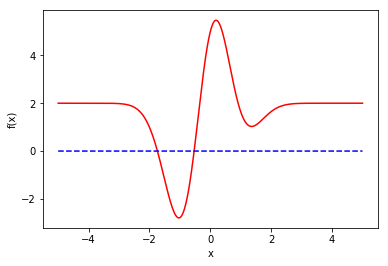

In [2]:
import numpy as np
from matplotlib import pyplot as plt

def funk(x):
    poly = 3.0 + 5.0*x - 10.0*(x**2.0) + 1.0*(x**3)
    expo = np.exp(-(x**2.0))
    f = poly * expo + 2
    return f

x = np.linspace(-5,5,10000)
f = funk(x)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x,f,linestyle='-', color='red')
zero = 0.0*x
plt.plot(x,zero,linestyle='--', color='blue')
plt.show()

Write a function that takes *funk()* and a desired level of accuracy (in $x$) as an input and uses a brute-force gridding algorithm to return the location and value of the (global) minimum.

#### 2.  iterative improvement

We can start with one or more trial locations and then iteratively move to better ones (e.g. by replace the highest point with a new, better estimate)

* key challenge is to generate new trial locations that yield better estimates

* good example: the famous "Nelder-Mead" or "simplex" algorithm
    * a "simplex" is just a collection of $d+1$ points    
    * capable of "enclosing" a specific location in $d$-dimensional parameter space    
        * e.g. for $d = 1$, simplex consists of 2 points, which can enclose $x_{min}$
        * trial locations based on moves representing
            * reflection
            * expansion
            * contraction
        * picture this like an amoeba moving through parameter space       
        * simplex "oozes" towards and contracts around the minimum

* advantages
    * very good general-purpose algorithm, even in higher dimensions
    * no need for derivatives
<br><br>
* disadvantages
    * can get fooled by local minima
    * can occasionally also fail on problems that "should" be solvable
    * general convergence properties not known

##### Exercise

Write a function that takes *funk()*, along with two bracketing locations $x_1$ and $x_2$ as input and uses bisection to successively replace the location corresponding to the higher value of $f(x)$ with a new location suggested by bisection (until this new location no longer corresponds to a lower $f(x)$ or until some pre-set level of accuracy has been reached).

Note: we have not covered bisection yet, but it simply means taking the half-way point between two existing points. So, given $x_1$ and $x_2$, your function should choose as its next trial location $x_{try} = x_1 + 0.5*x_2$.

Try the algorithm for a range of different initial bracketing locations $x_1$ and $x_2$. Also test to see what happens when $x_1$ and $x_2$ do not bracket the minimum (or bracket only the local minimum).

How well does this algorithm work? Think about the ways in which it can fail and whether/how these are dealt with by the simpex algorithm.

#### 3. use derivatives to step downhill
        
We can try using (numerical or analytical) derivatives in order to consistently move "downhill".

* a key issue for such methods is how far to step in the direction of the gradient<br><br>
* advantages
    * can be very efficient when derivatives are known and cheap
<br><br>
* disadvantages
    * requires derivatives
    * can be inefficient for some functions
        * local "downhill" direction does not have to point towards minimum           

#### practical recommendations

I recommend using brute-force gridding whenever it's viable to do so. It's the simplest, most robust and easiest to understand method.

If brute-force gridding is not viable (usually because there are too many dimensions to explore), I would recommend trying the simplex algorithm. This is a nice, general-purpose method that often does surprisingly well, even in situations where one might not expect it to.

Finally, whenever you minimize a function, be aware of the limitations of most numerical minimizers. Most importantly, with the exception of brute-force gridding, they are all susceptible to getting stuck in local minima. 

*Always sanity-check your function and your results!*

#### minimization with *scipy*

A general-purpose miminization function called <a href="http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize"> minimize()</a> is included in the <a href="http://docs.scipy.org/doc/scipy/reference/optimize.html">optimize</a> module within *scipy*.

The *minimize()* function includes support for both iterative-improvement algorithms (e.g. Nealder-Mead simplex and Powell's method) and derivative-based methods (such as the "conjugate gradient" and "quasi-Newton" algorithms).

The type of algorithm to be used is passed to the *minimize()* as an input parameter.

##### Exercise

Use *scipy's* *curve_fit()* to fit a linear relation to the provided galaxy redshift data (in hubble.dat file). Plot the fitted model over the data, error bars included. What value for Hubble's constant does your fitted model give? The following function may be useful.


In [22]:
def polynomial_relation (params, x, n):
    if len(params) == n + 1:
        y = np.zeros(len(x));
        for i,param in enumerate(params):
            y = y + param * x**i
        return y

    else:
        print ("Aborting: Not enough paramters provided")
        return None

##### Exercise

Use *scipy's* *minimize()* to fit a linear relation to the provided galaxy redshift data (in hubble.dat file) using $\chi^2$ minimization. Plot the fitted model over the data, error bars included. What value for Hubble's constant does your fitted model give? Now fit a higher order (n>1) polynomial and plot it on the same graph. Evaluate the goodness of fit of both models using the reduced $\chi^2$ statistic. The following function may be useful.


In [23]:
def chi2_polynomial(params, xdata, ydata, error, n):
    
    modelvals = polynomial_relation(params, xdata, n)
    
    return np.sum((ydata - modelvals)**2.0/(error**2.0))

## interpolation

It is extremely common that the outcome of an experiment or an observation consists of *samples* of some function $y = f(x)$, i.e. we are given a fixed number of pairs of $(x_i, y_i)$. We do not know what the underlying continuous function is (if we did, we wouldn't have needed to do the experiment).

In such cases, it is almost inevitable that we will need to numerically estimate the value of the function at some new location $x$, which is not part of the known set of $x_i$ values.

If neither $x_i$ nor $y_i$ are subject to significant errors/uncertainties, and if $f(x)$ is known to be a smooth, continuous function, we typically obtain such estimates by *interpolating* on the known values:

* **Interpolation** here refers to the construction of some continuous function that:
    * goes through all of the known data points
        * $g(x_i) = y_i$
    * (hopefully) provides a reasonable approximation to $f(x)$ *between* the data points.

#### nearest-neighbour interpolation

The simplest possible interpolation algorithm is *nearest-neighbour* interpolation.

In nearest-neighbour interpolation, our estimate of $f(x_{try})$ is simply $f(x_i)$, with $x_i$ chosen such that it is the closest point on the grid to $x_{try}$.

Nearest-neighbour interpolation doesn't really have any significant advantages over linear interpolation, which we'll cover next, other than perhaps being even faster. We won't deal with it any further here.

### linear interpolation

Perhaps the most obvious way to interpolate between two data points $(x_1, y_1)$ and $(x_1, y_2)$ is to connect them with a straight line.

This corresponds to taking 
<div align="center"> 
$g(x) = y_1 + \left(\frac{x - x_1}{x_2 - x_1}\right) (y_2 - y_1)$ 
</div>

in the interval $x_1 \leq x \leq x_2$.

Linear interpolation for a set of more than two data points then simply requires connecting each successive pair by a straight line.

<div align="center"><img height=50% width=50% src="lininterp.png"> </img></div>

##### Exercise (optional)

First make sure you understand the equation describing linear interpolation above. Then implement a function that carries out linear interpolation on an arbitrary function defined on an arbitrary (sorted) grid.

A useful alternative way to think about linear interpolation is to think of it as a weighted average of the two bracketing data points. 

We can see this more clearly by writing
<div align="center">
$g(x) = w_1 y_1 + w_2 y_2$.
</div>

A little algebra shows that this is equivalent to our linear interpolation equation if the weights are
<br><br>
<div align="center">
$w_1 = 1 - \frac{x - x_1}{x_2 - x_1}$
<br><br> 
$w_2 = 1 - \frac{x - x_2}{x_2 - x_1}$.
</div>

##### Exercise (optional)

Carry out the steps required to transform the original equation we had for linear interpolation into the "weighted average" notation shown above. Make sure you understand why the weights are eminently reasonable: each known point is weighted linearly according to its distance from the trial point.

This representation is useful because it generalizes easily to higher dimensions. For example, suppose we want to carry out *bilinear* interpolation on a 2-D function $z = f(x,y)$, for which we have samples on a 2-D grid of data points, $(x_i, y_i)$.

Bilinear interpolation can be thought of as simply carrying out successive linear interpolations. That is, in order to find an estimate for $z(x,y)$, we first carry out a 1-D linear interpolation (say in $x$) to obtain estimates for $z(x,y_1)$ and $z(x,y_2$). We then obtain our estimate of $z(x,y)$ by interpolating linear between these two along the $y$ direction.

Let's see how the weighted average form of the 1-D linear interpolation equation makes it easy to derive the equation for *bilinear* interpolation.

Looking at the the weighted average form of the 1-D equation, it is immediately clear that our interpolating function will have the form:

<div align="center">
$g(x) = w_{11} \, z(x_1,y_1) + w_{12}\,  z(x_1,y_2) + w_{21}\,  z(x_2,y_1) + w_{22}\,z(x_2,y_2)$
</div>

All this says is that our estimate will be a weighted average of the points defining the grid square that encloses our trial point. The only question is: what should the weights $w_{ij}$ be?

Looking again at the weighted average equation for 1-D linear interpolation suggests we might want to use:
<br><br>
<div align="center">
$w_{11} = (1 - \frac{x - x_1}{x_2 - x_1})(1 - \frac{y - y_1}{y_2 - y_1})$
<br><br> 
$w_{12} = (1 - \frac{x - x_1}{x_2 - x_1})(1 - \frac{y - y_2}{y_2 - y_1})$
<br><br>
$w_{21} = (1 - \frac{x - x_2}{x_2 - x_1})(1 - \frac{y - y_1}{y_2 - y_1})$
<br><br> 
$w_{22} = (1 - \frac{x - x_2}{x_2 - x_1})(1 - \frac{y - y_2}{y_2 - y_1})$.
</div>

We can write this more compactly as
<br><br>
<div align="center">
$w_{ij} = (1 - \frac{x - x_i}{x_2 - x_1})(1 - \frac{y - y_j}{y_2 - y_1})$.
</div>
<br><br>
This form can be generalized straightforwardly to $d > 2$ dimensions.

##### Exercise (advanced, optional)

Implement a bilinear interpolation function in *Python*. A reasonable implementation might take three 2-D arrays defining $x_i$, $y_i$, $z_i$. You may want to look back at our discussion of the *numpy* function *meshgrid()* to help you set up such arrays. Your function will also have to take as input a trial point, $(x_{try}, y_{try})$, and should then return an estimate of $z(x_{try}, y_{try})$ based on bilinear interpolation. 

Note that the first step in your routine will have to be the identification of the four points that bracket $(x_{try}, y_{try})$.

Linear interpolation is almost always the first thing we tend to rely on when we have to interpolate a function.

Its advantages are:<br>
* it is easy to understand
* it is easy to implement
* it is quick
* given a "reasonable" function and samples, it never produces "crazy" results
* it produces a continuous function.

This is an impressive list, and it justifies the popularity of this simple method. 

However, it also has some disadvantages:
* it produces discontinuous first derivatives (at the location of the samples)
* for certain types of functions, it may not be as precise as methods.

If this matters, we need to employ higher-order interpolating functions, the most common being *cubic splines*.

### higher-order interpolation

The most common reason to move beyond linear interpolation is that we might require our function to have continuous derivatives (perhaps even higher order derivatives).
The

In such cases, we have to move beyond a piece-wise linear approximation of our function. The obvious next step is instead approximate it as some sort of higher-order polynomial (or combination of polynomials).

There are two basic ways of doing this.

#### polynomial interpolation

Suppose we have a set of $N$ data point, $(x_i, y_i)$, with $i = 1...N$. We can then obviously construct a polynomial of degree $N-1$ that will go through all of these data points. This is the interpolating polynomial.

In practice, direct polynomial interpolation is not widely used. The reason is that when $N$ gets large, the resulting polynomial can -- and usually will -- oscillate wildly between our sample points. This is not good.

#### spline interpolation

A much more common higher-order interpolation method is to construct a *sequence* of lower-order polynomials (in the same way that linear interpolation is a sequence of first-order polynomials).

The idea behind spline interpolation is to connect the points in a way that minimizes the "bending" of the resulting curve. The term "spline" is the name of a sort of "bendy ruler" that was used to draw curves like this in practice.

Cubic splines are the most commonly used type of splines. The basic idea behind their construction is that any two sample points $(x_1,y_1)$ and $(x_2,y_2)$ are connected by a 3rd order (cubic) polynomial that goes through both of these points. The two polynomials that "meet" at a given $x_i$ are further constrained to have the same first and second derivatives at $x_i$. These constraints define a unique set of polynomial coefficients and also minimize the bendiness of the resulting function.

Since cubic splines are smooth combination of just 3rd order polynomials, they do not produce the wild oscillations between data points that are commonly associated with direct (higher-order) polynomial interpolation.

### interpolation with *scipy*

There is a dedicated interpolation module in *scipy*, appropriately named <a href="http://docs.scipy.org/doc/scipy/reference/interpolate.html#module-scipy.interpolate">interpolate</a>.

The two main functions we should be aware of in this module are <a href= "http://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html#scipy.interpolate.interp1d">interp1d()</a> and <a href="http://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.griddata.html#scipy.interpolate.griddata">griddata()</a>.

*interp1d()* provides nearest-neighbour, linear and cubic spline interpolation for 1-dimensional functions.

*griddata()* provides the same for multi-dimensional functions.

##### Exercise (optional)

First familiarize yourself with *interp1d()* and *griddata()*. Then write a program that uses these functions to interpolate 1-D and 2-D functions. Compare the results to your own linear and bilinear interpolation functions.